### Preparacion de la info

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import joblib
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel


df = pd.read_csv("loan_data.csv")

selected_features = [
    'person_age',
    'person_gender',
    'person_education',
    'person_income',
    'person_emp_exp',
    'person_home_ownership',
    'loan_amnt',
    'loan_intent',
    'credit_score',
    'previous_loan_defaults_on_file'
]

X = df[selected_features]
y = df["loan_status"]

num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop='first'), cat_features)
])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))


joblib.dump(model, "modelo_entrenado.pkl")

C:\Users\paumo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:44:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6990
           1       0.77      0.79      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.86      0.85      9000
weighted avg       0.90      0.90      0.90      9000



['modelo_entrenado.pkl']

In [2]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1')
print(f"Puntuaciones F1 por validación cruzada: {cv_scores}")
print(f"Media F1: {cv_scores.mean():.3f}");


C:\Users\paumo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:44:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\paumo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:44:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\paumo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:44:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:

Puntuaciones F1 por validación cruzada: [0.76481481 0.77300995 0.77076827 0.77602524 0.76825798]
Media F1: 0.771


In [3]:
from sklearn.metrics import f1_score

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"F1 Score en train: {f1_train:.3f}")
print(f"F1 Score en test: {f1_test:.3f}")


F1 Score en train: 0.999
F1 Score en test: 0.775


In [4]:
print(y.value_counts(normalize=True))


loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

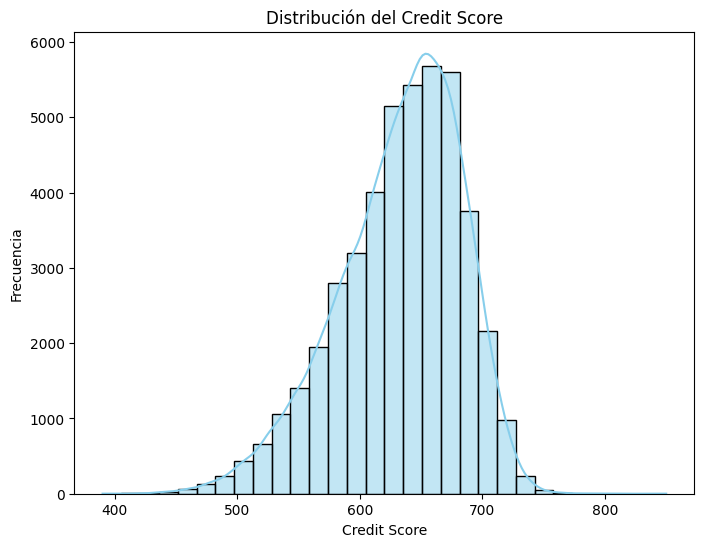

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(df['credit_score'], bins=30, kde=True, color="skyblue")
plt.title("Distribución del Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Frecuencia")
plt.show()

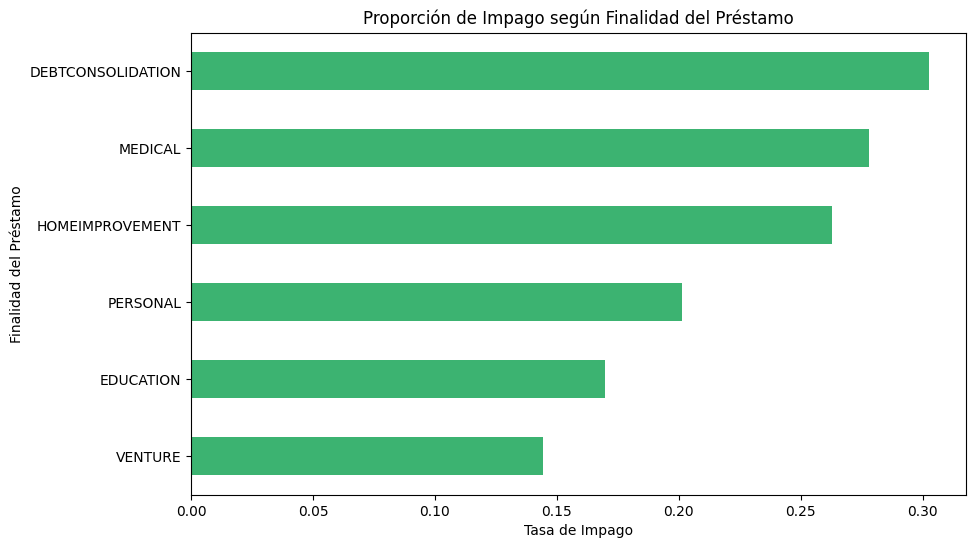

In [7]:
loan_intent_impago = df.groupby('loan_intent')['loan_status'].mean().sort_values()

plt.figure(figsize=(10,6))
loan_intent_impago.plot(kind='barh', color="mediumseagreen")
plt.title("Proporción de Impago según Finalidad del Préstamo")
plt.xlabel("Tasa de Impago")
plt.ylabel("Finalidad del Préstamo")
plt.show()

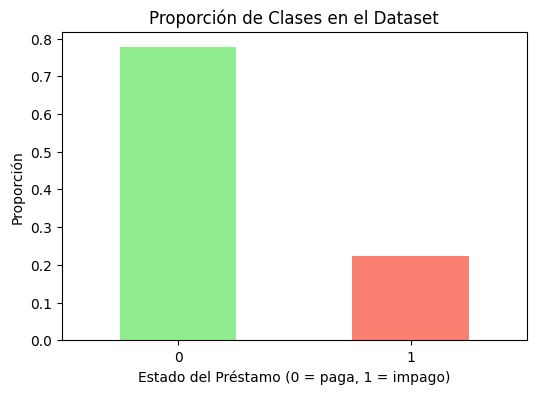

In [8]:
plt.figure(figsize=(6,4))
df['loan_status'].value_counts(normalize=True).plot(kind='bar', color=["lightgreen", "salmon"])
plt.title("Proporción de Clases en el Dataset")
plt.xlabel("Estado del Préstamo (0 = paga, 1 = impago)")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.show()

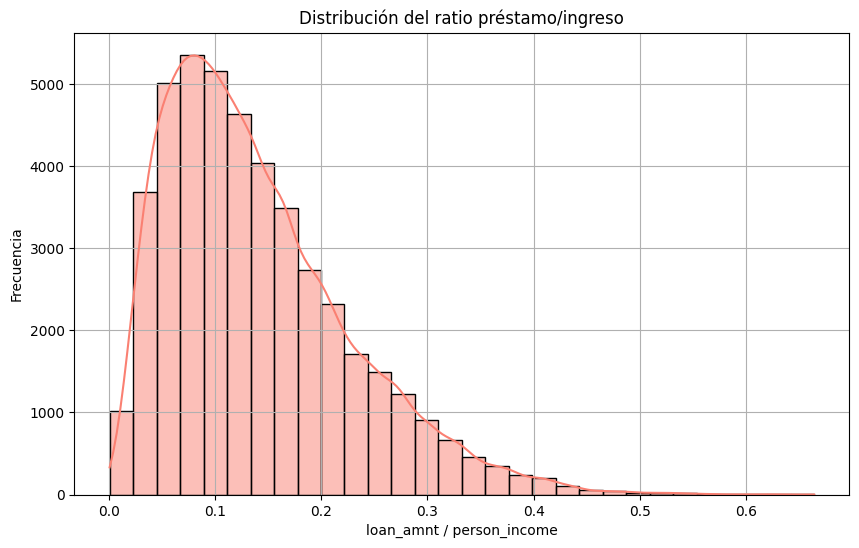

In [9]:
df['loan_to_income'] = df['loan_amnt'] / df['person_income']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['loan_to_income'], bins=30, kde=True, color='salmon')
plt.title('Distribución del ratio préstamo/ingreso')
plt.xlabel('loan_amnt / person_income')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


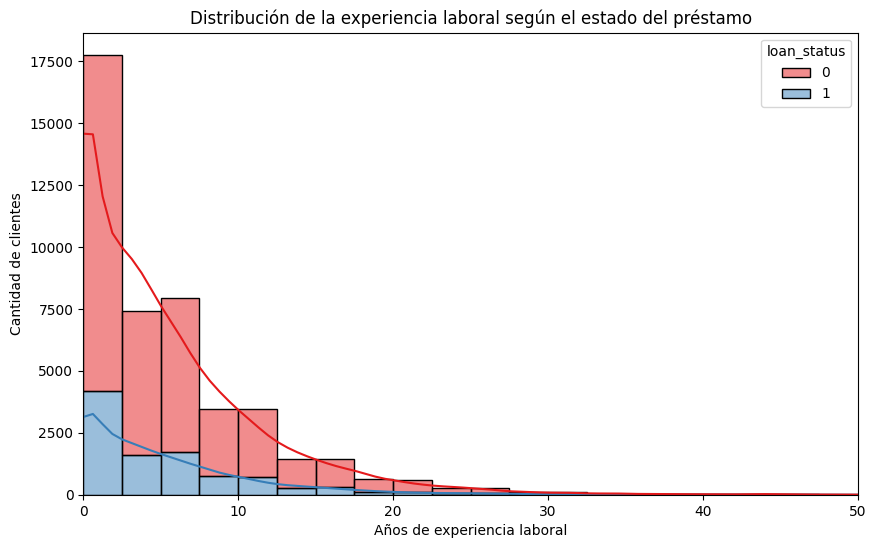

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='person_emp_exp', hue='loan_status', bins=50, kde=True, palette='Set1', multiple='stack')
plt.title('Distribución de la experiencia laboral según el estado del préstamo')
plt.xlabel('Años de experiencia laboral')
plt.ylabel('Cantidad de clientes')
plt.xlim(0, 50)
plt.show()